# Exploratory Data Analysis

In [41]:
# import

import pandas as pd
import os
import kagglehub
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display

random_state = 42

### Loading dataset and explore:

In [ ]:
# Download latest version
path = kagglehub.dataset_download("monishakant/dataset-for-stress-analysis-in-social-media")

print("Path to dataset files:", path)

Path to dataset files: /Users/jacopoamoretti/.cache/kagglehub/datasets/monishakant/dataset-for-stress-analysis-in-social-media/versions/1


In [ ]:
os.listdir(path)


['dreaddit_StressAnalysis - Sheet1.csv']

In [ ]:
# Load dataset

csv_path = os.path.join(path, "dreaddit_StressAnalysis - Sheet1.csv")
df = pd.read_csv(csv_path)

df.head()


,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1514980773,22,-1.238793,...,1.0000,1.2000,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1493348050,5,7.684583,...,1.4000,1.1250,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.0,1524516630,10,2.360408,...,1.1429,1.0000,1.0,1.70974,1.52985,1.86108,1.00,8,3.149288,-0.036818
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.5,1524018289,5,5.997000,...,1.0000,1.3000,1.0,1.72615,1.52000,1.84909,1.00,7,6.606000,-0.066667
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.8,1516200171,138,4.649418,...,1.1250,1.1429,1.0,1.75642,1.43582,1.91725,0.84,70,4.801869,0.141667


In [ ]:
# Dataset shape

df.shape 

(715, 116)

In [ ]:
# Dataset columns

df.columns

Index(['id', 'subreddit', 'post_id', 'sentence_range', 'text', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='str', length=116)

In [ ]:
# Dataset info

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Columns: 116 entries, id to sentiment
dtypes: float64(106), int64(6), str(4)
memory usage: 977.1 KB


In [ ]:
# Dataset Describe

df.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,715.000000,715.000000,715.000000,7.150000e+02,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,...,715.000000,715.000000,715.00000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,13861.372028,0.516084,0.717895,1.517570e+09,24.627972,4.705624,85.667133,34.743399,38.410839,69.917413,...,1.081046,1.117715,1.00028,1.723382,1.529951,1.878992,0.856294,8.951049,5.497574,0.045345
std,17765.755427,0.500091,0.325688,1.553944e+07,113.086473,3.244652,31.197320,26.331580,30.834289,31.682491,...,0.107884,0.089972,0.00748,0.048894,0.100724,0.056044,0.174352,12.891993,2.490971,0.194114
min,2.000000,0.000000,0.000000,1.483330e+09,0.000000,-4.800000,12.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.574670,1.281480,1.718540,0.200000,0.000000,-2.318095,-1.000000
25%,848.000000,0.000000,0.600000,1.509572e+09,2.000000,2.584422,65.000000,11.975000,10.340000,46.400000,...,1.000000,1.000000,1.00000,1.692570,1.464260,1.841965,0.765000,2.000000,3.693035,-0.056181
50%,1778.000000,1.000000,0.800000,1.516658e+09,5.000000,4.477286,81.000000,30.370000,30.240000,84.470000,...,1.000000,1.125000,1.00000,1.720660,1.523260,1.878170,0.910000,5.000000,5.327778,0.042460
75%,26201.500000,1.000000,1.000000,1.531001e+09,10.000000,6.723889,101.500000,53.480000,61.580000,96.945000,...,1.125000,1.142900,1.00000,1.753110,1.592570,1.910965,1.000000,11.000000,7.049380,0.154701
max,55783.000000,1.000000,1.000000,1.542583e+09,1687.000000,22.535493,264.000000,98.220000,99.000000,99.000000,...,1.777800,1.777800,1.20000,1.946420,2.040000,2.140430,1.000000,128.000000,18.530103,0.800000


The dataset contains 715 Reddit posts annotated for stress-related content.
In addition to raw text, it includes a wide range of pre-computed linguistic, affective, and readability features (e.g. LIWC-style metrics, DAL affect scores, syntactic complexity indices), enabling both text-based modeling and interpretable feature-based analysis.

### Label distribution:

In [ ]:
# Label distribution:
df["label"].value_counts(normalize=True)


label
1    0.516084
0    0.483916
Name: proportion, dtype: float64

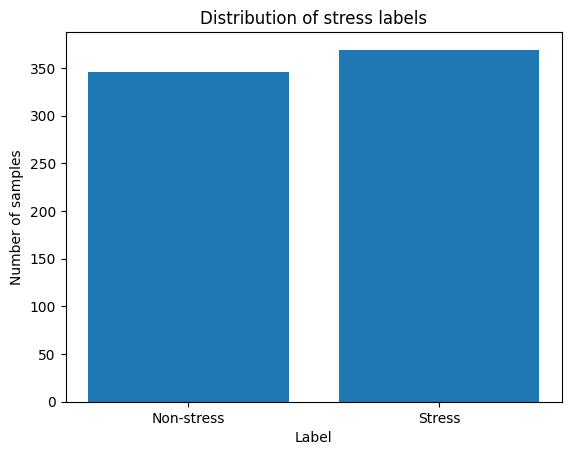

In [23]:
# Histogram for the distribution of labels

label_counts = df['label'].value_counts().sort_index()

plt.bar(label_counts.index, label_counts.values)
plt.xticks([0, 1], ['Non-stress', 'Stress'])
plt.xlabel('Label')
plt.ylabel('Number of samples')
plt.title('Distribution of stress labels')
plt.show()


The near-balanced distribution allows us to focus on model behavior and interpretability rather than class imbalance mitigation.

### Text Length Analysis:

In [22]:
# Text length

df["text_len"] = df["text"].str.split().str.len()
df["text_len"].describe()


/var/folders/hx/0_yxtmnd7gjdm83xkg0y66k80000gn/T/ipykernel_5956/677567866.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["text_len"] = df["text"].str.split().str.len()


count    715.000000
mean      85.448951
std       31.228643
min       12.000000
25%       65.000000
50%       81.000000
75%      101.000000
max      268.000000
Name: text_len, dtype: float64

Reddit posts in the dataset are relatively short, with most texts ranging between 65 and 100 words, and only a few longer outliers.
Given the text length distribution, a maximum sequence length of 128 tokens is sufficient to cover the majority of posts, minimizing truncation while keeping the model efficient.

The average post length is approximately 85 words, with a relatively narrow distribution.
Most posts fall well within typical Transformer input limits, allowing the use of standard architectures (e.g. BERT) without aggressive truncation strategies.

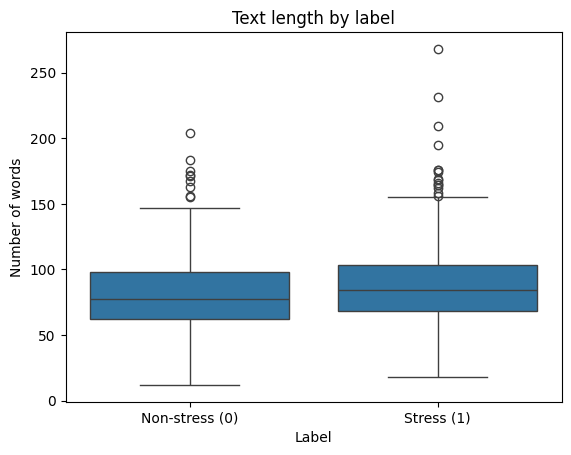

In [29]:
# Text legth by label

sns.boxplot(x="label", y="text_len", data=df) # sns.boxplot(x=df["label"], y=df["text_len"])
plt.xticks([0, 1], ["Non-stress (0)", "Stress (1)"])
plt.xlabel("Label")
plt.ylabel("Number of words")
plt.title("Text length by label")
plt.show()


Stress-related posts show a slightly higher median text length and a larger number of long outliers compared to non-stress posts. However, the substantial overlap between the two distributions suggests that text length alone is not sufficient to reliably discriminate stress-related content.

In [44]:
# 5 stress examples vs 5 non-stress examples

non_stress_examples = df[df["label"] == 0].sample(5, random_state=random_state)

stress_examples = df[df["label"] == 1].sample(5, random_state=random_state)

with pd.option_context("display.max_colwidth", None):
    display(non_stress_examples[["text", "text_len"]])


,text,text_len
237,"While presenting today, I had absoluly no flight-or-flight panic even when in an confrontational, adversarial discussion about sports or politics. I've always gotten a little flustered during these types of conversations in the past. I'm even witty at times. Please do give this supplement a try. Best of luck.",49
336,You can still trigger them even though you are a good guy. You can still get offended when they tell you they can't trust you even though it is the PTSD talking and not them. You feel like a failure when they tell you they feel hopeless and that nobody can help them. It really sucks when all you want to do is love them and they can't accept it or feel it. Especially when they are the most amazing person you have ever met when they are not triggered and in their right mind.,95
582,"I am looking for people who are interested in being in the project. Please reach out to me if you are interested! Please do not take my photos for use without my permission however. If you need help, please call 1-800-273-8255 for the Suicide Hotline, or 911 for emergencies. To view this project, you can view it at my website at <url> \- I wanted to showcase the photos in the thread, but I cannot share photos in this thread.",80
431,"The title pretty much says it all but I want to add all the gory details. In my girlfriends family there are a lot of hammy downs. There is just a plethora of clothing and obscene amounts of things that nobody needs, so when I want a thing the answer is almost universally ""lets ask my mom first before buying"". In my life thus far I don't really take other peoples things. I have like 5 pairs of jeans and like 3 more pants I bought for work, but other than that I don't have extra stuff and I like it that way.",103
656,I'm a single dad of two daughters (3 and 4). I live in a privately owned apartment with them and the AC went out but is getting fixed tomorrow. I live paycheck to paycheck and can't afford to get a hotel. They are at daycare until 4 when I get off work. I live in Mesa AZ and its been over 100 degrees for weeks.,65


In [42]:
with pd.option_context("display.max_colwidth", None):
    display(stress_examples[["text", "text_len"]])


,text,text_len
626,Why fix the leak when the rubber mallet driving the cork into the hole disturbs the family when the damp doesn’t bother them quite so much at the moment. Never mind the water is rotting the floorboards. Never mind the mold growing in corners. Never mind how sick I get from exposure. Now here comes the real question: Do I abandon the ship or go down with it?,68
70,Any advice is welcome. I'll be checking in and replying to comments as much as I can but I have to be discreet so I may not be able to answer for a while. Thank you in advanced. Tldr: I was ready to move out then my car broke down and he is now fixing it. He doesn't know I'm leaving as soon as he's done and I feel terrible about it because he's actually being nice for a change and is trying to stay sober.,86
33,"I've been texting Rebecca on and off for the last week, always about my breakup. Bill went through Rebecca's phone last night and saw she was texting me. He lost his mind. He won't speak to her, and said I betrayed him. I tried to explain that he is my best friend and even if I liked Rebecca I would never try anything, ever.",64
673,"I don't have PTSD, I know how debilitating it is for you guys who do, but I thought I'd post in here because you might be aware of the symptoms and see if there's any connection? Basically I used to be severely bullied back in school and I've never gotten over it. I have nightmares, and even like ""day-mares"", where something somebody does or says makes me remember something that happened, suddenly, and it makes me lose all concentration as I just stare into space remembering the event. Sometimes they're recurring, sometimes they pop out of some dark corner of my mind, where all the oppressed memories are. I've never fully recovered, and I've only recently got to a place where nobody takes the piss out of me for some reason or another.",133
114,I leave and breakdown in the kitchen because I’m still scared and freaked out. And the fact that I feel that I have to apologize for being triggered and am unable to control my reaction infuriates me. The part that confuses me is that when I was assaulted as a child I was never held down. I was frozen in fear. So why am I panicking over this seemingly innocent situation?,71


A qualitative inspection of randomly sampled posts reveals clear stylistic and emotional differences between the two classes.

Non-stress posts tend to be more concise and factual, often describing situations in a neutral or pragmatic tone.

In contrast, stress-related posts frequently exhibit emotionally charged language, first-person narratives, and expressions of worry, frustration, or rumination. Several stress posts are noticeably longer, reflecting extended personal accounts or emotional venting.